C:\Users\Simbo\AppData\Local\Temp\ipykernel_79188\3013898274.py:11: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MachineLearningRating_v3.txt", sep='|')


H1 - Claim Frequency across Provinces: p-value = 0.0000
Contingency Table:
 HasClaim        False  True 
Province                    
Eastern Cape    30286     50
Free State       8088     11
Gauteng        392543   1322
KwaZulu-Natal  169298    483
Limpopo         24769     67
Mpumalanga      52590    128
North West     142938    349
Northern Cape    6372      8
Western Cape   170426    370
Reject H0
H1 - Claim Severity (Gauteng vs KwaZulu-Natal): p-value = 0.0007
Mean Severity (Gauteng): 22243.88, (KwaZulu-Natal): 29609.49
Reject H0
H2 - Claim Frequency across Zip Codes: p-value = 0.0000
Contingency Table (first 5 rows):
 HasClaim    False  True 
PostalCode              
1            5329     12
2            1482      6
4              77      0
5             396      4
6             438      2
Reject H0
H3 - Margin (1459 vs 1513): p-value = 0.6630
Mean Margin (1459): 73.87, (1513): 83.83
Fail to reject H0
H4 - Claim Frequency between Gender: p-value = 0.0266
Contingency Table:
 HasCl

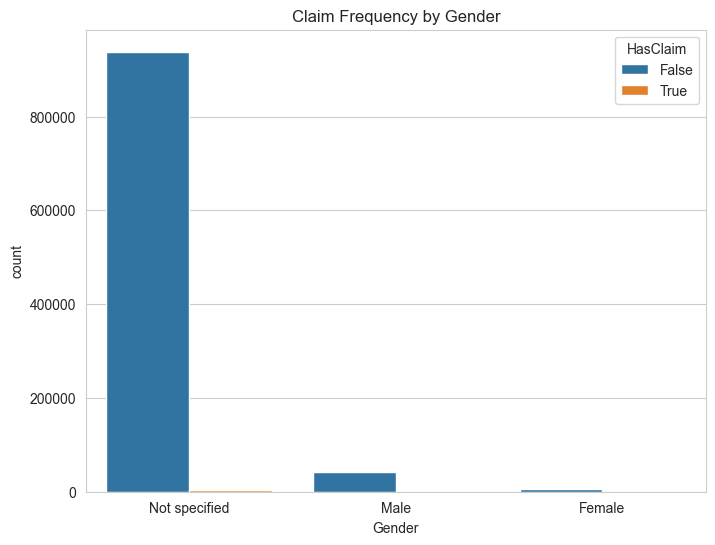

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

try:
    # Load data (adjust sep based on inspection)
    df = pd.read_csv("../data/MachineLearningRating_v3.txt", sep='|')
except FileNotFoundError:
    print("Error: MachineLearningRating_v3.txt not found in data/.")
    exit()

# Define metrics
df['HasClaim'] = df['TotalClaims'] > 0
df['ClaimSeverity'] = df['TotalClaims'].where(df['HasClaim'], np.nan)
df['Margin'] = df['TotalPremium'] - df['TotalClaims']

# Helper: Chi-squared test
def chi_squared_test(data, group_col, metric='HasClaim'):
    contingency_table = pd.crosstab(data[group_col], data[metric])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    return p_value, contingency_table

# Helper: T-test
def t_test(data, group_col, metric, group1, group2):
    group1_data = data[data[group_col] == group1][metric].dropna()
    group2_data = data[data[group_col] == group2][metric].dropna()
    if len(group1_data) < 2 or len(group2_data) < 2:
        return None, None, None
    t_stat, p_value = ttest_ind(group1_data, group2_data, equal_var=False)
    return p_value, group1_data.mean(), group2_data.mean()

# H1: Provinces (Claim Frequency)
p_province_freq, table_province = chi_squared_test(df, 'Province')
print(f"H1 - Claim Frequency across Provinces: p-value = {p_province_freq:.4f}")
print("Contingency Table:\n", table_province)
print("Reject H0" if p_province_freq < 0.05 else "Fail to reject H0")

# H1: Provinces (Claim Severity)
provinces = df['Province'].dropna().unique()
if len(provinces) >= 2:
    p_province_sev, mean1, mean2 = t_test(df, 'Province', 'ClaimSeverity', provinces[0], provinces[1])
    if p_province_sev is not None:
        print(f"H1 - Claim Severity ({provinces[0]} vs {provinces[1]}): p-value = {p_province_sev:.4f}")
        print(f"Mean Severity ({provinces[0]}): {mean1:.2f}, ({provinces[1]}): {mean2:.2f}")
        print("Reject H0" if p_province_sev < 0.05 else "Fail to reject H0")

# H2: Zip Codes (Claim Frequency)
p_zip_freq, table_zip = chi_squared_test(df, 'PostalCode')
print(f"H2 - Claim Frequency across Zip Codes: p-value = {p_zip_freq:.4f}")
print("Contingency Table (first 5 rows):\n", table_zip.head())
print("Reject H0" if p_zip_freq < 0.05 else "Fail to reject H0")

# H2: Zip Codes (Claim Severity)
zip_codes = df['PostalCode'].dropna().unique()
if len(zip_codes) >= 2:
    p_zip_sev, mean1, mean2 = t_test(df, 'PostalCode', 'ClaimSeverity', zip_codes[0], zip_codes[1])
    if p_zip_sev is not None:
        print(f"H2 - Claim Severity ({zip_codes[0]} vs {zip_codes[1]}): p-value = {p_zip_sev:.4f}")
        print(f"Mean Severity ({zip_codes[0]}): {mean1:.2f}, ({zip_codes[1]}): {mean2:.2f}")
        print("Reject H0" if p_zip_sev < 0.05 else "Fail to reject H0")

# H3: Zip Codes (Margin)
if len(zip_codes) >= 2:
    p_zip_margin, mean1, mean2 = t_test(df, 'PostalCode', 'Margin', zip_codes[0], zip_codes[1])
    if p_zip_margin is not None:
        print(f"H3 - Margin ({zip_codes[0]} vs {zip_codes[1]}): p-value = {p_zip_margin:.4f}")
        print(f"Mean Margin ({zip_codes[0]}): {mean1:.2f}, ({zip_codes[1]}): {mean2:.2f}")
        print("Reject H0" if p_zip_margin < 0.05 else "Fail to reject H0")

# H4: Gender (Claim Frequency)
p_gender_freq, table_gender = chi_squared_test(df, 'Gender')
print(f"H4 - Claim Frequency between Gender: p-value = {p_gender_freq:.4f}")
print("Contingency Table:\n", table_gender)
print("Reject H0" if p_gender_freq < 0.05 else "Fail to reject H0")

# H4: Gender (Claim Severity)
p_gender_sev, mean_women, mean_men = t_test(df, 'Gender', 'ClaimSeverity', 'Female', 'Male')
if p_gender_sev is not None:
    print(f"H4 - Claim Severity (Female vs Male): p-value = {p_gender_sev:.4f}")
    print(f"Mean Severity (Female): {mean_women:.2f}, (Male): {mean_men:.2f}")
    print("Reject H0" if p_gender_sev < 0.05 else "Fail to reject H0")

# Visualization
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='HasClaim')
plt.title('Claim Frequency by Gender')
plt.savefig('../docs/claim_frequency_gender.png')
plt.show()